In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from IPython.display import clear_output
import matplotlib.pyplot as plt
import mplleaflet
import shapely
from geopandas.plotting import plot_polygon_collection
from meshjp import *

%matplotlib inline

# Find mesh code from longitude, latitude

In [3]:
meshcode = containing_mesh(139.7514729, 35.7055263, level="500m")
meshcode

533946403

# Find coordinate from meshcode

In [4]:
coord = mesh_coord(meshcode)
coord

(139.75, 35.70416666666667, 139.75625, 35.70833333333334)

# Plot on an interactive map

With [shapely](https://pypi.org/project/Shapely/), [geopandas](https://pypi.org/project/geopandas/) and [mplleaflet](https://pypi.org/project/mplleaflet/) libraries.

(array('d', [139.75625, 139.75625, 139.75, 139.75, 139.75625]), array('d', [35.70416666666667, 35.70833333333334, 35.70833333333334, 35.70416666666667, 35.70416666666667]))


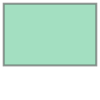

In [5]:
g = shapely.geometry.box(*coord)
print(g.exterior.xy)
g

In [6]:
fig, ax = plt.subplots()
plot_polygon_collection(ax, [g], edgecolor="#333333", facecolor="#00ffff")
clear_output()

mplleaflet.display(fig)

# Find the mesh areas that cover a geometry object

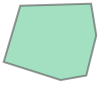

In [7]:
g = shapely.geometry.Polygon([
    [139.75403845310208, 35.70740106395741],
    [139.7508305311203, 35.707309588931416],
    [139.75007951259613, 35.70476131387285],
    [139.75265979766846, 35.703942363738165],
    [139.7538185119629, 35.70414710206052],
    [139.75427448749542, 35.70596358712732],
    [139.75403845310208, 35.70740106395741]
])
g

In [8]:
fig, ax = plt.subplots()
plot_polygon_collection(ax, [g])
clear_output()

mplleaflet.display(fig)

In [9]:
meshes = mesh_cover(g, level="125m")
meshes

[53394640311,
 53394640313,
 53394640331,
 53394640333,
 53394640134,
 53394640312,
 53394640314,
 53394640332,
 53394640334,
 53394640143,
 53394640321,
 53394640323,
 53394640341,
 53394640343]

In [10]:
coords = mesh_coord(meshes)
coords

(array([139.75     , 139.75     , 139.75     , 139.75     , 139.7515625,
        139.7515625, 139.7515625, 139.7515625, 139.7515625, 139.753125 ,
        139.753125 , 139.753125 , 139.753125 , 139.753125 ]),
 array([35.70416667, 35.70520833, 35.70625   , 35.70729167, 35.703125  ,
        35.70416667, 35.70520833, 35.70625   , 35.70729167, 35.703125  ,
        35.70416667, 35.70520833, 35.70625   , 35.70729167]),
 array([139.7515625, 139.7515625, 139.7515625, 139.7515625, 139.753125 ,
        139.753125 , 139.753125 , 139.753125 , 139.753125 , 139.7546875,
        139.7546875, 139.7546875, 139.7546875, 139.7546875]),
 array([35.70520833, 35.70625   , 35.70729167, 35.70833333, 35.70416667,
        35.70520833, 35.70625   , 35.70729167, 35.70833333, 35.70416667,
        35.70520833, 35.70625   , 35.70729167, 35.70833333]))

In [11]:
rects = [shapely.geometry.box(*c) for c in zip(*coords)]
rects

In [12]:
fig, ax = plt.subplots()
plot_polygon_collection(ax, [g])
plot_polygon_collection(ax, rects, edgecolor="#555555", facecolor="#aaaa00")
clear_output()

mplleaflet.display(fig)

# Find mesh areas inside a geometry

In [13]:
meshes = contained_mesh(g, level="125m")
meshes

[53394640314, 53394640332]

In [14]:
coords = mesh_coord(meshes)
rects = [shapely.geometry.box(*c) for c in zip(*coords)]

In [15]:
fig, ax = plt.subplots()
plot_polygon_collection(ax, [g], facecolor="#111111")
plot_polygon_collection(ax, rects, edgecolor="#555555", facecolor="#aaaa00")
clear_output()

mplleaflet.display(fig)